In [91]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [92]:
df = pd.read_csv(r'D:\python class arja mohan\videos\Real_state_new\DT//dt.csv')


In [93]:
df = pd.get_dummies(df,columns = ['Engine', 'turbo', 'weight','fuel','fast'],drop_first=True)

In [94]:
y = df[['fast_yes']]
x = df.drop(['fast_yes'],axis=1)
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(x,y)

In [97]:
df.head(2)

,Engine_medium,Engine_small,turbo_yes,weight_heavy,weight_light,fuel_bad,fuel_good,fast_yes
0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0


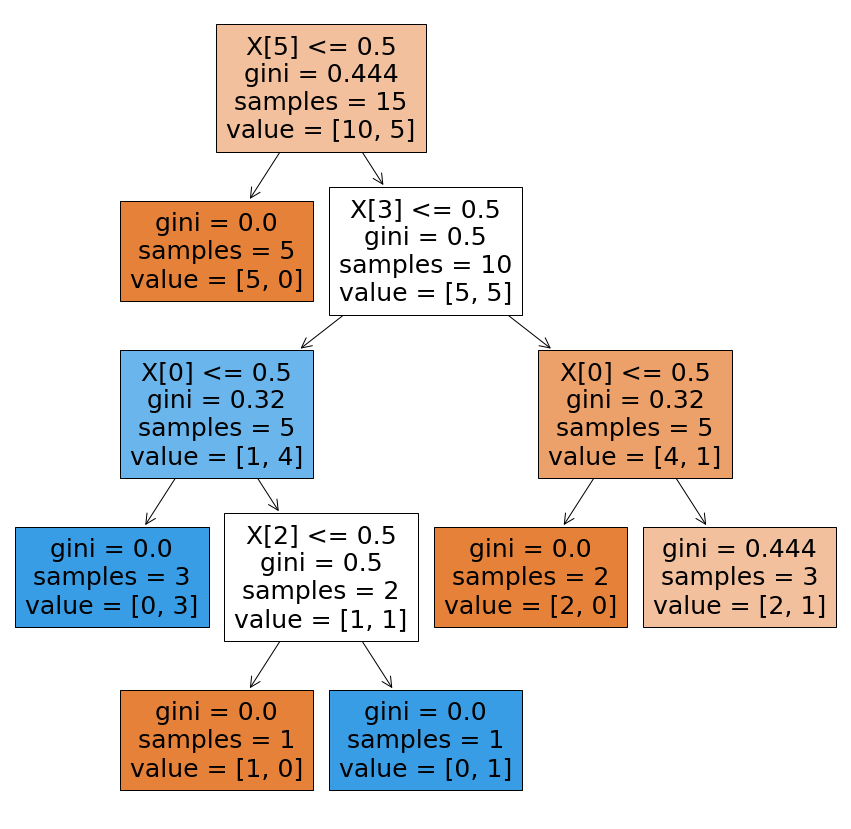

In [96]:

plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)

plt.show()

In [23]:
df.head(1)

,Engine_medium,Engine_small,turbo_yes,weight_heavy,weight_light,fuel_bad,fuel_good,fast_yes
0,0,1,0,0,0,0,1,0


In [22]:
print(tree.export_text(clf))

|--- feature_5 <= 0.50
|   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0



In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [49]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [52]:
print(confusion_matrix(y_test,y_pred))

[[3 0]
 [1 1]]


In [53]:
print(tree.export_text(clf))

|--- feature_5 <= 0.50
|   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- class: 0



## Gini Index

In [21]:
#Gini Function
#a and b are the quantities of each class
def gini(a,b):
    a1 = (a/(a+b))**2
    b1 = (b/(a+b))**2
    return 1 - (a1 + b1)

In [27]:
import pandas as pd

#Blank lists
gini_list = []
blue_list = []
red_list = []
blue_prob_list = []
#Looping Gini function on random blue and red float amounts
for x in range (10000):
 blue = random.uniform(0, 4)
 red = abs(4-blue)
 a = gini(red,blue)
 b = blue/(blue+red)
 gini_list.append(a)
 blue_list.append(blue)
 red_list.append(red)
 blue_prob_list.append(b)
#Dataframe of amount of blue, red, Probability of blue, and gini score
df = pd.DataFrame({'Blue': blue_list,'Red': red_list,'Gini Score': gini_list, 'Probability of Blue': blue_prob_list})
df = df[['Red', 'Blue', 'Probability of Blue', 'Gini Score']]
df.head()

,Red,Blue,Probability of Blue,Gini Score
0,1.561135,2.438865,0.609716,0.475925
1,2.564588,1.435412,0.358853,0.460155
2,3.964282,0.035718,0.008929,0.017699
3,2.823256,1.176744,0.294186,0.415281
4,1.215881,2.784119,0.696030,0.423145


# Entropy and Information gain

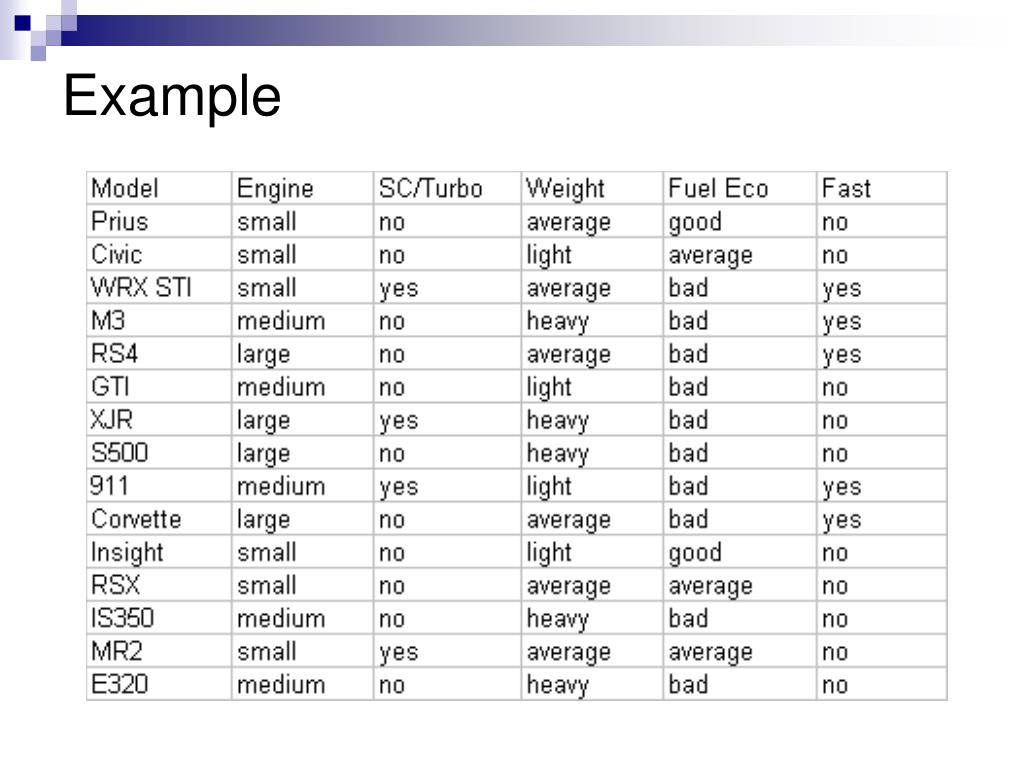

In [30]:
from IPython.display import Image
Image(filename = 'example-l.jpg',width=700,height=300)

In [31]:
# Fast dependent variable entropy as root

import math
from math import log2
#total_yes = 5
#total_no = 10
Fast_total_entropy = -((5/15 * log2 (5/15)) + (10/15 * log2 (10/15)))
Fast_total_entropy

0.9182958340544896

engine_entropy_small  -- yes-5 no-1 total-6
engine_entropy_medium  --yes-2 no-3 total-5
engine_entropy_large  -- yes-2 no-2 total-4

In [32]:
engine_entropy_small = -((5/6 * log2 (5/6)) + (1/6 * log2 (1/6)))
print(engine_entropy_small)
engine_entropy_medium = -((2/5 * log2 (2/5)) + (3/5 * log2 (3/5)))
print(engine_entropy_medium)
engine_entropy_large = -((2/4 * log2 (2/4)) + (2/4 * log2 (2/4)))
engine_entropy_large                                                           

0.6500224216483541
0.9709505944546686


1.0

In [33]:
engine_total_entropy = (6/15 * engine_entropy_small) + (5/15*engine_entropy_medium) + (4/15*engine_entropy_large)
engine_total_entropy

0.8503258334775645

In [34]:
# Engine Information gain 
Engine_Information_gain = Fast_total_entropy - engine_total_entropy
Engine_Information_gain

0.06797000057692504

sc_turbo_yes - y-2 n-2 total-4
sc_turbo_no -  y-3 n-8 total -11

In [35]:
sc_turbo_yes = -((2/4 * log2 (2/4)) + (2/4 * log2 (2/4)))
print(sc_turbo_yes) 
sc_turbo_no = -((3/11 * log2 (3/11)) + (8/11 * log2 (8/11)))
print(sc_turbo_no)

1.0
0.8453509366224365


In [36]:
turbo_total_entropy = (4/15 * engine_entropy_small) + (11/15*engine_entropy_medium) 
turbo_total_entropy

0.8853697483729847

In [37]:
# Turbo Information gain 
turbo_Information_gain = Fast_total_entropy - turbo_total_entropy
turbo_Information_gain

0.0329260856815049

weight_entropy_average  -- yes-3 no-3 total-6
weight_entropy_light  --yes-1 no-3 total-4
weight_entropy_heavy  -- yes-1 no-4 total-5

In [38]:
weight_entropy_average = -((3/6 * log2 (3/6)) + (3/6 * log2 (3/6)))
print(weight_entropy_average)
weight_entropy_light = -((1/4 * log2 (1/4)) + (3/4 * log2 (3/4)))
print(weight_entropy_light)
weight_entropy_heavy =  -((1/5 * log2 (1/5)) + (4/5 * log2 (4/5)))
weight_entropy_heavy

1.0
0.8112781244591328


0.7219280948873623

In [39]:
weight_total_entropy = (6/15 * weight_entropy_average) + (4/15*weight_entropy_light)  + (5/15*weight_entropy_light)
weight_total_entropy

0.8867668746754797

In [40]:
# weight Information gain 
weight_Information_gain = Fast_total_entropy - weight_total_entropy
weight_Information_gain

0.0315289593790099

fuel_entropy_good  -- yes-0 no-2 total-2

fuel_entropy_average  --yes-0 no-3 total-3

fuel_entropy_bad  -- yes-5 no-5 total-10

In [44]:
fuel_entropy_average = ((2/2 * log2 (2/2)))
print(fuel_entropy_average)
fuel_entropy_good = ((3/3 * log2 (3/3) )+0)
print(fuel_entropy_good)
fuel_entropy_bad =  -((5/10 * log2 (5/10)) + (5/10 * log2 (5/10)))
fuel_entropy_bad

0.0
0.0


1.0

In [45]:
fuel_total_entropy = (2/15 * fuel_entropy_average) + (3/15*fuel_entropy_good)  + (10/15*fuel_entropy_bad)
fuel_total_entropy

0.6666666666666666

In [46]:
# fuel Information gain 
fuel_Information_gain = Fast_total_entropy - fuel_total_entropy
fuel_Information_gain

0.2516291673878229

### hare we know that fuel feature is best for first split in fual good and average entropy is 0 that means 
### its acheave their goeal its a leaf node so now we need to split only bad 

### now we what to know next split feature.

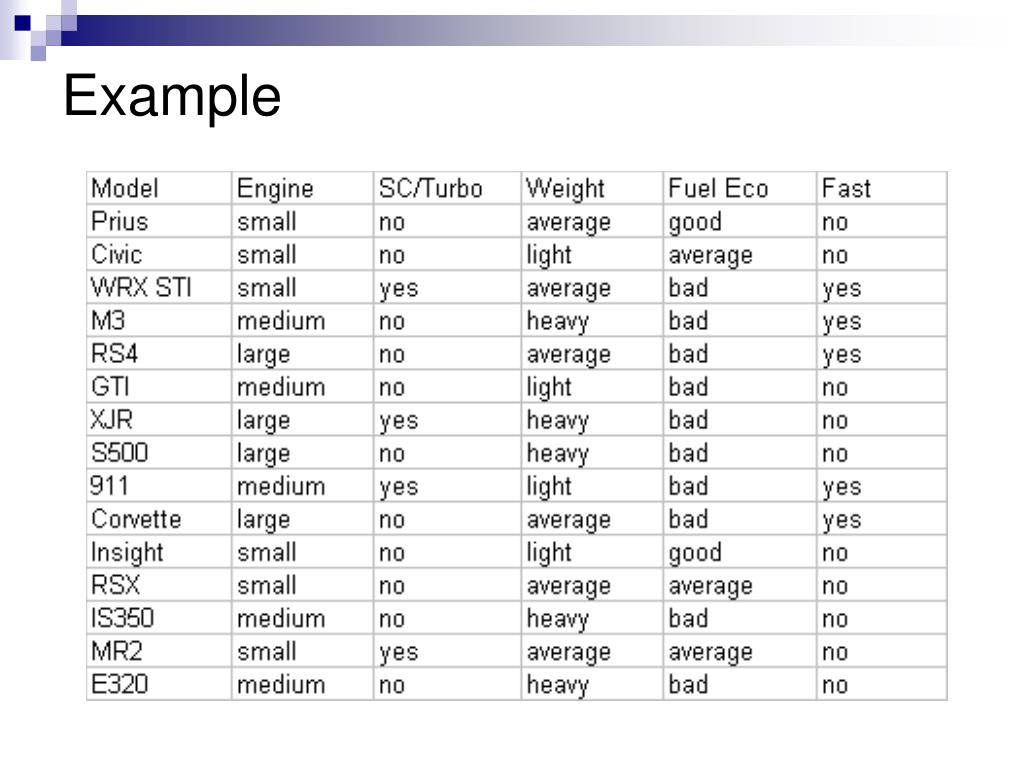

In [161]:
from IPython.display import Image
Image(filename = 'example-l.jpg',width=700,height=300)

In [ ]:
fast_bed_entropy y-5 n-5 total-10 

In [162]:
fast_bed_entropy = -((5/10 * log2 (5/10)) + (5/10 * log2 (5/10)))
fast_bed_entropy

1.0

In [ ]:
engine_bed_entropy_small - y-1
engine_bed_entropy_medium - y-2 n-3  total -5
engine_bed_entropy_large -  y-2  n-2 total -4

In [172]:
engine_bed_entropy_small = (1/1 * log2 (1/1)) 
print(engine_bed_entropy_small)
engine_bed_entropy_medium = -((2/5 * log2 (2/5)) + (3/5 * log2 (3/5)))
print(engine_bed_entropy_medium)
engine_bed_entropy_large = -((2/4 * log2 (2/4)) + (2/4 * log2 (2/4)))
engine_bed_entropy_large

0.0
0.9709505944546686


1.0

In [174]:
engine_bed_total_entropy = (1/10 * engine_bed_entropy_small) + (5/10*engine_bed_entropy_medium) + (4/10*engine_bed_entropy_large)
engine_bed_total_entropy

0.8854752972273343

In [ ]:
# engine bad Information gain 

In [176]:
engine_bed_information_gain = fast_bed_entropy - engine_bed_total_entropy
engine_bed_information_gain

0.11452470277266569

In [ ]:
turbo_bed_entropy_yes - y-2 n-1 total -3 
turbo_bed_entropy_no - y-3 n-4  total -7


In [177]:
turbo_bed_entropy_yes = -((2/3 * log2 (2/3)) + (1/3 * log2 (1/3)))
print(turbo_bed_entropy_yes)
turbo_bed_entropy_no = -((3/7 * log2 (3/7)) + (4/7 * log2 (4/7)))
print(turbo_bed_entropy_no)


0.9182958340544896
0.9852281360342516


In [178]:
turbo_bed_total_entropy = (3/10 * turbo_bed_entropy_yes) + (7/10*turbo_bed_entropy_no) 
turbo_bed_total_entropy

0.965148445440323

In [179]:
# Turbo bad Information gain 
turbo_bed_information_gain = fast_bed_entropy - turbo_bed_total_entropy
turbo_bed_information_gain

0.034851554559677034

In [ ]:
weight_bed_entropy_average - y-3  total-3
weight_bed_entropy_heavy - y-1 n-4  total -5
weight_bed_entropy_light -  y-1  n-1 total -2

In [186]:
weight_bed_entropy_average = (3/3 * log2 (3/3)) 
print(weight_bed_entropy_average)
weight_bed_entropy_heavy = -((1/5 * log2 (1/5)) + (4/5 * log2 (4/5)))
print(weight_bed_entropy_heavy)  
weight_bed_entropy_light = -((1/2 * log2 (1/2)) + (1/2 * log2 (1/2)))
weight_bed_entropy_light

0.0
0.7219280948873623


1.0

In [188]:
weight_bed_total_entropy = (3/10 * weight_bed_entropy_average) + (5/10*weight_bed_entropy_heavy) + (2/10*weight_bed_entropy_light) 
weight_bed_total_entropy

0.5609640474436812

In [189]:
# weight bad Information gain 
weight_bed_information_gain = fast_bed_entropy - weight_bed_total_entropy
weight_bed_information_gain

0.4390359525563188